In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy 
import skimage.io

In [2]:
def removeBorder(img):

    return img[30:len(img)-20 , 30 : len(img[0]) - 20]

def load_image(path_input):
    img = skimage.io.imread(path_input)
    return img

In [3]:
path_image = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P4/07.jpg'

image = load_image(path_image)
pixels = np.array(image)

# a

In [17]:
def extract_channels(img):
    channels = []
    for k in range(3):
        img2 = np.zeros((round(len(img) / 3), len(img[0]) - 20, 1), np.uint8)
        print(img2.shape)
        for i in range(len(img2)):
            for j in range(len(img2[0])):

                if k == 0:
                    img2[i][j] = img[i + (2 * len(img2))][j]

                if k == 1:
                    img2[i][j] = img[i + len(img2)][j]

                if k == 2:
                    img2[i][j] = img[i][j]
        channels.append(img2)
    return channels

# b

In [20]:
def stack_channels(blue,green,red):

    img2 = np.zeros((len(red) , len(red[0]) , 3), np.uint8)
    for i in range(len(img2)):
        for j in range(len(img2[0])):
            img2[i][j][0] = blue[i][j]
            img2[i][j][1] = green[i][j]
            img2[i][j][2] = red[i][j]
    return img2

In [21]:
channels_image = extract_channels(pixels)
rgb = stack_channels(channels_image[0],channels_image[1],channels_image[2])
org_img = removeBorder(rgb)

(341, 373, 1)
(341, 373, 1)
(341, 373, 1)


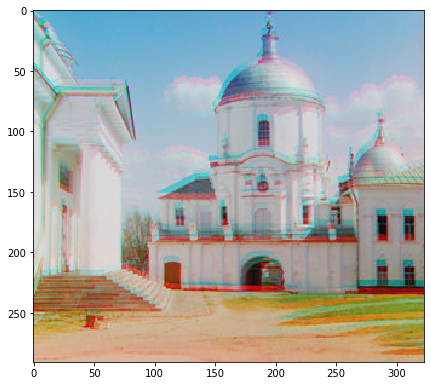

In [22]:
plt.figure(figsize = (7,7))
plt.imshow(org_img)
plt.show()

# C

In [25]:
def get_gradient(im) :

    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)

    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [24]:
height,width,channel = org_img.shape

In [26]:
im_aligned = np.zeros((height,width,channel), dtype=np.uint8 )

In [48]:
im_aligned[:,:,2] = org_img[:,:,2]

In [49]:
def align_results(org_img,im_aligned):
    warp_mode = cv2.MOTION_HOMOGRAPHY
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)
    for i in range(0,2) :
        (cc, warp_matrix) = cv2.findTransformECC (get_gradient(org_img[:,:,2]), get_gradient(org_img[:,:,i]),warp_matrix, warp_mode, criteria,inputMask=None,gaussFiltSize = 3)

        if warp_mode == cv2.MOTION_HOMOGRAPHY :
            im_aligned[:,:,i] = cv2.warpPerspective (org_img[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
        else :
            im_aligned[:,:,i] = cv2.warpAffine(org_img[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    return im_aligned


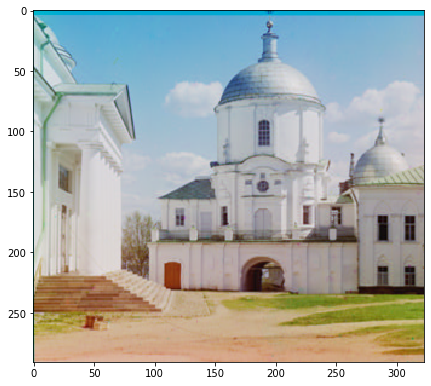

In [50]:
image_align_result = align_results(org_img,im_aligned)
plt.figure(figsize = (7,7))
plt.imshow(image_align_result)
plt.show()

# d

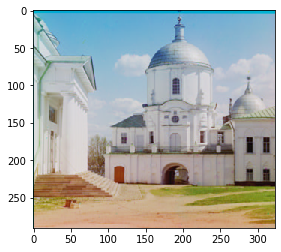

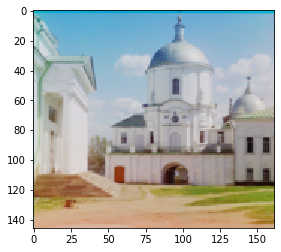

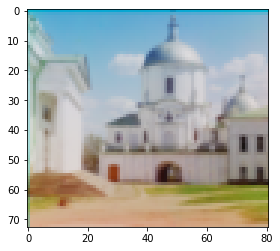

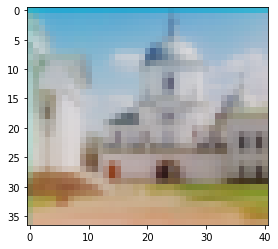

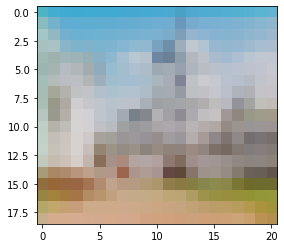

In [51]:
from skimage.transform import pyramid_gaussian
for (i, resized) in enumerate(pyramid_gaussian(image_align_result, downscale=2)):
    if resized.shape[0] < 15 or resized.shape[1] < 15:
        break
    plt.imshow(resized) 
    plt.show()

# 2nd image:

In [52]:
path_image = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P4/11.jpg'
image = load_image(path_image)
pixels = np.array(image)

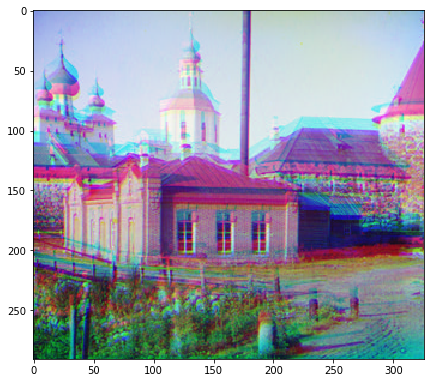

In [53]:
channels_image = extract_channels(pixels)
rgb = stack_channels(channels_image[0],channels_image[1],channels_image[2])
org_img = removeBorder(rgb)
plt.figure(figsize = (7,7))
plt.imshow(org_img)
plt.show()

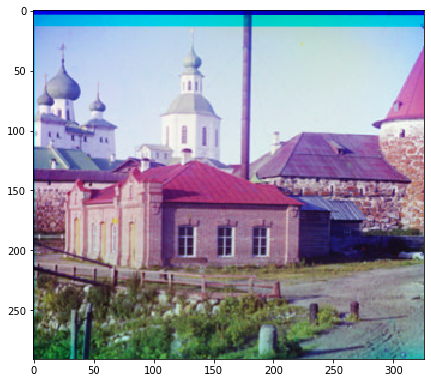

In [54]:
height,width,channel = org_img.shape
im_aligned = np.zeros((height,width,channel), dtype=np.uint8 )
# The blue and green channels will be aligned to the red channel.
im_aligned[:,:,2] = org_img[:,:,2]
image_align_result = align_results(org_img,im_aligned)
plt.figure(figsize = (7,7))
plt.imshow(image_align_result)
plt.show()

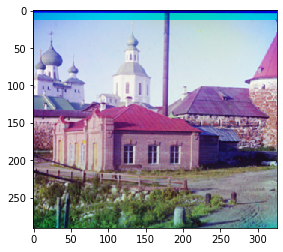

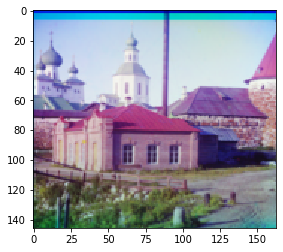

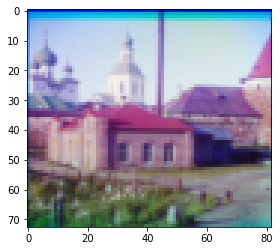

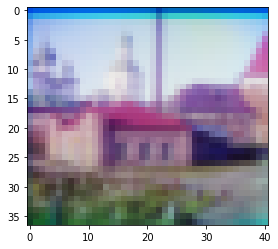

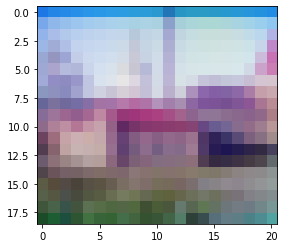

In [55]:
from skimage.transform import pyramid_gaussian
for (i, resized) in enumerate(pyramid_gaussian(image_align_result, downscale=2)):
    if resized.shape[0] < 15 or resized.shape[1] < 15:
        break
    plt.imshow(resized) 
    plt.show()
    


# 3rd image

In [57]:
path_image = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P4/09.jpg'
image = load_image(path_image)
pixels = np.array(image)

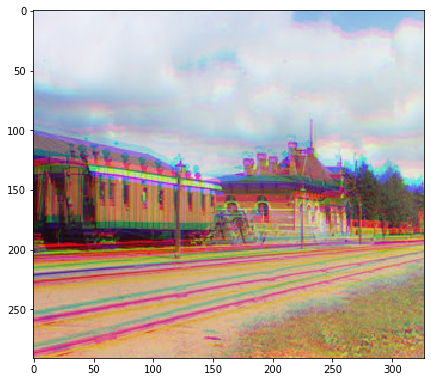

In [58]:
channels_image = extract_channels(pixels)
rgb = stack_channels(channels_image[0],channels_image[1],channels_image[2])
org_img = removeBorder(rgb)
plt.figure(figsize = (7,7))
plt.imshow(org_img)
plt.show()

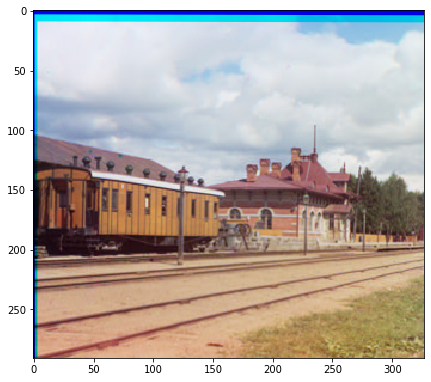

In [59]:
height,width,channel = org_img.shape
im_aligned = np.zeros((height,width,channel), dtype=np.uint8 )
im_aligned[:,:,2] = org_img[:,:,2]
image_align_result = align_results(org_img,im_aligned)
plt.figure(figsize = (7,7))
plt.imshow(image_align_result)
plt.show()

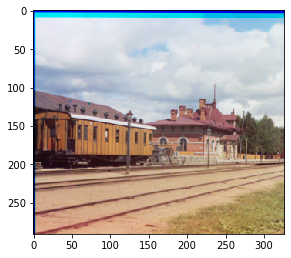

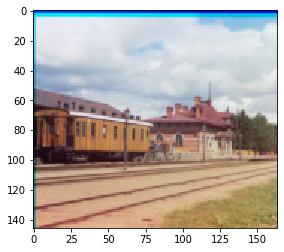

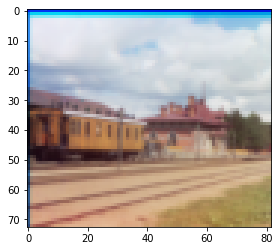

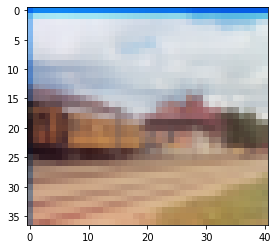

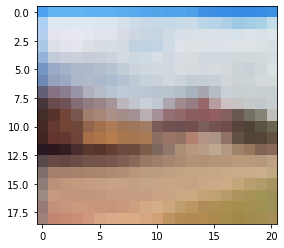

In [71]:
from skimage.transform import pyramid_gaussian
plt.figure(figsize = (4.5,4.5))
for (i, resized) in enumerate(pyramid_gaussian(image_align_result, downscale=2)):
    if resized.shape[0] < 15 or resized.shape[1] < 15:
        break
    plt.imshow(resized) 
    plt.show()
    
